In [18]:
import pandas as pd

# Load all relevant datasets
athletes_df = pd.read_csv('athletes.csv')
medals_df = pd.read_csv('medals.csv')
events_df = pd.read_csv('events.csv')
schedules_df = pd.read_csv('schedules.csv')
teams_df = pd.read_csv('teams.csv')

# Print basic info about each dataset
print("Athletes dataset shape:", athletes_df.shape)
print("Medals dataset shape:", medals_df.shape)
print("Events dataset shape:", events_df.shape)
print("Schedules dataset shape:", schedules_df.shape)
print("Teams dataset shape:", teams_df.shape)

Athletes dataset shape: (11113, 36)
Medals dataset shape: (1044, 13)
Events dataset shape: (329, 5)
Schedules dataset shape: (3895, 16)
Teams dataset shape: (1698, 16)


**Athletes**

In [3]:
# Basic dataset information
print("Dataset Info:")
print(athletes_df.info())

# First few rows to inspect data formatting
print("\nFirst 5 Rows:")
print(athletes_df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11113 non-null  int64  
 1   current             11113 non-null  bool   
 2   name                11113 non-null  object 
 3   name_short          11110 non-null  object 
 4   name_tv             11110 non-null  object 
 5   gender              11113 non-null  object 
 6   function            11113 non-null  object 
 7   country_code        11113 non-null  object 
 8   country             11113 non-null  object 
 9   country_long        11113 non-null  object 
 10  nationality         11110 non-null  object 
 11  nationality_long    11110 non-null  object 
 12  nationality_code    11110 non-null  object 
 13  height              11110 non-null  float64
 14  weight              11108 non-null  float64
 15  disciplines         11113 non-null  obj

In [19]:
# Check for missing values
missing_values = athletes_df.isnull().sum()
missing_percentage = (missing_values / len(athletes_df)) * 100

# Create a summary dataframe for missing values
missing_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
}).sort_values(by="Missing Values", ascending=False)

print("\nMissing Values Summary:")
print(missing_summary)

# Check unique data types
print("\nData Types:")
print(athletes_df.dtypes)



Missing Values Summary:
                    Missing Values  Percentage (%)
ritual                       10256       92.288311
other_sports                 10053       90.461622
influence                     8958       80.608297
sporting_relatives            8595       77.341852
philosophy                    8330       74.957257
nickname                      8147       73.310537
hero                          7798       70.170071
hobbies                       6906       62.143436
education                     5575       50.166472
family                        5552       49.959507
reason                        5267       47.394943
residence_place               4309       38.774408
coach                         2891       26.014578
residence_country             2825       25.420678
birth_place                   2386       21.470350
birth_country                 1638       14.739494
occupation                    1529       13.758661
lang                           508        4.571223
weight

1. Columns with High Missing Values
Columns to Drop (High % Missing):

ritual (92%), other_sports (90%), influence (80%), sporting_relatives (77%), and others with >50% missing values.
These columns are too sparse to provide meaningful insights.
Columns to Review:

Columns like coach (26% missing), residence_place (38%), and birth_country (14%) may still provide value depending on the analysis.
2. Columns with Minimal Missing Values
Important Numerical Columns:
height and weight have very few missing values (<1%), so they can be easily filled with the mean or median.
Categorical Columns:
Columns like name_short, name_tv, and nationality have minimal missing values and can be filled as needed.
3. Formatting Issues
Date Column (birth_date):
Needs to be converted to datetime for calculating age.
Boolean and Numerical Columns:
current and code are clean and do not need adjustments.
4. Relevant Columns for Analysis
We should focus on the following:

Demographics:
gender, age (calculated from birth_date), country, country_long.
Physical Attributes:
height, weight.
Performance:
disciplines, events.
Additional Insights:
Columns like coach, education, occupation, and birth_place may add context if needed.

In [20]:
# Drop irrelevant/sparse columns
sparse_cols = ['ritual', 'other_sports', 'influence', 'sporting_relatives', 
               'philosophy', 'hero', 'hobbies', 'nickname']
athletes_df = athletes_df.drop(columns=sparse_cols)

# Handle missing values
athletes_df['gender'] = athletes_df['gender'].fillna('Unknown')

# Convert and calculate age
athletes_df['birth_date'] = pd.to_datetime(athletes_df['birth_date'], errors='coerce')
athletes_df['age'] = 2024 - athletes_df['birth_date'].dt.year
athletes_df['age'] = athletes_df['age'].fillna(athletes_df['age'].mean()).astype(int)
athletes_df['disciplines'] = athletes_df['disciplines'].str.strip('[]').str.strip("'")
# Group age into categories
athletes_df['age_group'] = pd.cut(athletes_df['age'], bins=[0, 20, 30, 40, 50], labels=['<20', '20-30', '30-40', '>40'])

# Verify the cleaned dataset
print("\nCleaned Dataset Info:")
print(athletes_df.info())

# Preview cleaned data
print("\nFirst 5 Rows of Cleaned Data:")
print(athletes_df.head())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   code               11113 non-null  int64         
 1   current            11113 non-null  bool          
 2   name               11113 non-null  object        
 3   name_short         11110 non-null  object        
 4   name_tv            11110 non-null  object        
 5   gender             11113 non-null  object        
 6   function           11113 non-null  object        
 7   country_code       11113 non-null  object        
 8   country            11113 non-null  object        
 9   country_long       11113 non-null  object        
 10  nationality        11110 non-null  object        
 11  nationality_long   11110 non-null  object        
 12  nationality_code   11110 non-null  object        
 13  height             11110 non-null  flo

**Handling Missing Values**

In [6]:
from pandas.api.types import is_categorical_dtype

# Ensure 'Unknown' is added to the categories of 'age_group'
if 'age_group' in athletes_df.columns and isinstance(athletes_df['age_group'].dtype, pd.CategoricalDtype):
    athletes_df['age_group'] = athletes_df['age_group'].cat.add_categories('Unknown')

# Fill missing values for 'age_group' with 'Unknown'
athletes_df['age_group'] = athletes_df['age_group'].fillna('Unknown')

# Fill missing values for numerical columns
athletes_df = athletes_df.copy()  # Avoid SettingWithCopyWarning
# Drop rows where age, height, or weight is missing
athletes_df = athletes_df.dropna(subset=['age', 'height', 'weight'])

# Replace missing values in numerical columns with appropriate defaults (if needed)
athletes_df['height'] = athletes_df['height'].fillna(athletes_df['height'].mean())
athletes_df['weight'] = athletes_df['weight'].fillna(athletes_df['weight'].mean())
athletes_df['age'] = athletes_df['age'].fillna(athletes_df['age'].mean())

# Ensure no infinite or NaN values in computations
assert not athletes_df.isnull().any().any(), "There are still missing values!"

# athletes_df['height'] = athletes_df['height'].fillna(athletes_df['height'].median())
# athletes_df['weight'] = athletes_df['weight'].fillna(athletes_df['weight'].median())

# Fill missing categorical columns with 'Unknown'
categorical_cols = ['residence_place', 'residence_country', 'occupation', 'education', 'family', 'lang', 'coach']
athletes_df[categorical_cols] = athletes_df[categorical_cols].fillna('Unknown')

# Preview the updated dataset
print(athletes_df.info())


AssertionError: There are still missing values!

In [7]:
athletes_df.isnull().sum()

code                    0
current                 0
name                    0
name_short              0
name_tv                 0
gender                  0
function                0
country_code            0
country                 0
country_long            0
nationality             1
nationality_long        1
nationality_code        1
height                  0
weight                  0
disciplines             0
events                  0
birth_date              0
birth_place          2381
birth_country        1633
residence_place      4304
residence_country    2820
occupation           1524
education            5570
family               5547
lang                  503
coach                2886
reason               5262
age                     0
age_group               0
dtype: int64

**Selecting Required Columns**

In [30]:
# Selecting relevant columns for analysis
selected_columns = [
    'code', 'name', 'gender', 'age', 'nationality', 
    'residence_country', 'events', 'disciplines', 
    'age_group'
]


# Subsetting the DataFrame
athletes_subset = athletes_df[selected_columns]

adf=athletes_subset.copy()
adf['events'] = adf['events'].str.strip('[]').str.strip('"')
# Display the subset
print("Subset of Cleaned Data:")
print(adf.info())
print(adf.head())


Subset of Cleaned Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   code               11113 non-null  int64   
 1   name               11113 non-null  object  
 2   gender             11113 non-null  object  
 3   age                11113 non-null  int64   
 4   nationality        11110 non-null  object  
 5   residence_country  8288 non-null   object  
 6   events             11113 non-null  object  
 7   disciplines        11113 non-null  object  
 8   age_group          11076 non-null  category
dtypes: category(1), int64(2), object(6)
memory usage: 705.7+ KB
None
      code               name gender  age nationality residence_country  \
0  1532872   ALEKSANYAN Artur   Male   33     Armenia           Armenia   
1  1532873     AMOYAN Malkhas   Male   25     Armenia           Armenia   
2  1532874    GALSTYAN Slavik   Ma

**Age Distribution**

In [42]:
import plotly.express as px

# Histogram for age distribution by gender (side-by-side)
fig_age_grouped = px.histogram(
    adf, x="age", color="gender", nbins=30,
    barmode="group",  # Side-by-side bars
    title="Age Distribution by Gender",
    labels={"age": "Age", "count": "Number of Athletes"},
    color_discrete_map={"Male": "#636EFA", "Female": "#EF553B"}
)
fig_age_grouped.update_layout(
    bargap=0.2,  # Add slight gap between groups for clarity
    plot_bgcolor='white',
    title_x=0.5,
    xaxis_title="Age",
    yaxis_title="Number of Athletes",
    legend_title="Gender"
)
fig_age_grouped.show()



**Gender Representation by Discipline**

In [32]:
gender_discipline = pd.crosstab(adf['disciplines'], adf['gender'])
top_10_gender = gender_discipline.sum(axis=1).nlargest(10).index

fig_gender = go.Figure()
fig_gender.add_trace(go.Bar(
    x=top_10_gender,
    y=gender_discipline.loc[top_10_gender, 'Male'],
    name='Male',
    marker_color='#636EFA'
))
fig_gender.add_trace(go.Bar(
    x=top_10_gender,
    y=gender_discipline.loc[top_10_gender, 'Female'],
    name='Female',
    marker_color='#EF553B'
))

fig_gender.update_layout(
    title="Gender Distribution in Top 10 Disciplines",
    xaxis_title="Discipline",
    yaxis_title="Number of Athletes",
    barmode='group',
    plot_bgcolor='white',
    title_x=0.5
)
fig_gender.show()


**Nationality and Athlete Count**

In [33]:
country_counts = adf['nationality'].value_counts().head(20)

fig_countries = px.bar(
    x=country_counts.index, 
    y=country_counts.values,
    title="Top 20 Countries by Number of Athletes",
    labels={'x': 'Country', 'y': 'Number of Athletes'}
)
fig_countries.update_layout(
    plot_bgcolor='white',
    title_x=0.5
)
fig_countries.show()


**Age Group Distribution Across Top Disciplines**

In [34]:
discipline_age = pd.crosstab(adf['disciplines'], adf['age_group'])
top_10_disciplines = discipline_age.sum(axis=1).nlargest(10).index

fig_discipline = px.bar(
    discipline_age.loc[top_10_disciplines],
    title="Age Distribution Across Top 10 Disciplines",
    barmode="stack"
)
fig_discipline.update_layout(
    xaxis_title="Discipline",
    yaxis_title="Number of Athletes",
    plot_bgcolor='white',
    title_x=0.5
)
fig_discipline.show()


**Age vs. Disciplines (Box Plot)**

C:\Users\sreev\AppData\Local\Temp\ipykernel_53468\132631750.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




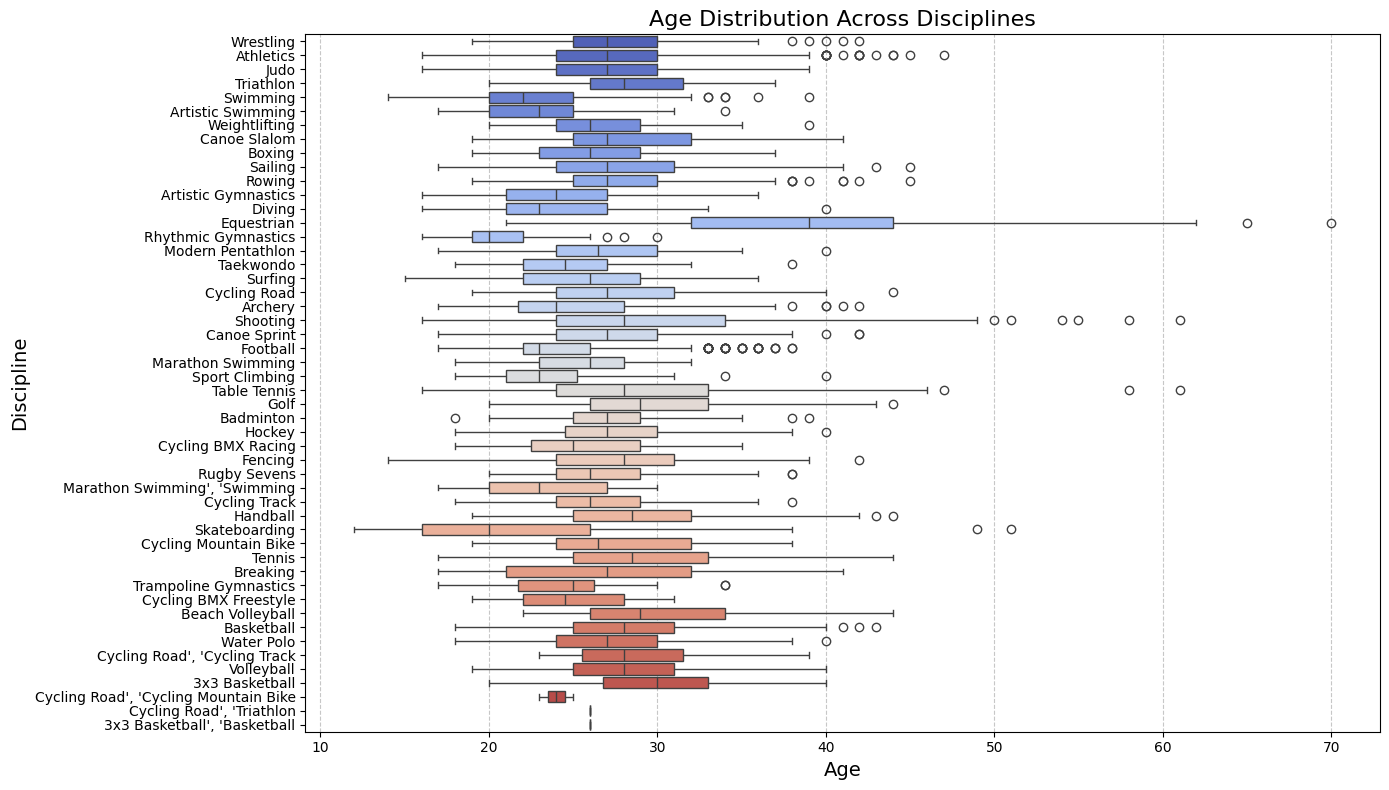

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
sns.boxplot(data=adf, x='age', y='disciplines', palette='coolwarm')
plt.title("Age Distribution Across Disciplines", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Discipline", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Athlete Representation by Events**

In [38]:
events_count = adf['events'].value_counts().head(10)

fig_events = px.bar(
    x=events_count.index, 
    y=events_count.values,
    title="Top 10 Events by Athlete Representation",
    labels={'x': 'Event', 'y': 'Number of Athletes'},
    color_discrete_sequence=["#636EFA"]
)
fig_events.update_layout(
    plot_bgcolor='white',
    title_x=0.5
)
fig_events.show()


In [39]:
import pandas as pd
import plotly.express as px

# Prepare data
discipline_age = pd.crosstab(adf['disciplines'], adf['age_group']).reset_index()
top_10_disciplines = discipline_age.set_index('disciplines').sum(axis=1).nlargest(10).index
filtered_data = discipline_age[discipline_age['disciplines'].isin(top_10_disciplines)]

# Melt data for Plotly
melted_data = filtered_data.melt(id_vars=['disciplines'], var_name='Age Group', value_name='Count')

# Create side-by-side bar chart
fig = px.bar(
    melted_data,
    x='disciplines',
    y='Count',
    color='Age Group',
    barmode='group',  # Side-by-side bars
    title="Age Group Distribution Across Top 10 Disciplines",
    labels={'disciplines': 'Discipline', 'Count': 'Number of Athletes'},
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Customize layout
fig.update_layout(
    xaxis_title="Discipline",
    yaxis_title="Number of Athletes",
    plot_bgcolor='white',
    title_x=0.5,
    legend_title="Age Group"
)
fig.show()


**Popular Events Across Nationalities**

In [52]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Create Dash app
app = Dash(__name__)

# Summarized view: Number of athletes by country
country_counts = adf['nationality'].value_counts().reset_index().head(10)
country_counts.columns = ['Country', 'Number of Athletes']

# Layout
app.layout = html.Div([
    dcc.Graph(id='main-bar-chart'),
    dcc.Graph(id='drilldown-bar-chart')
])

# Main chart: Top countries
@app.callback(
    Output('main-bar-chart', 'figure'),
    Input('main-bar-chart', 'figure')
)
def render_main_chart(_):
    fig_country = px.bar(
        country_counts,
        x='Country',
        y='Number of Athletes',
        title="Athlete Representation by Top 10 Countries",
        labels={'Country': 'Country', 'Number of Athletes': 'Athlete Count'},
        color='Number of Athletes',
        color_continuous_scale='Viridis'
    )
    fig_country.update_layout(title_x=0.5, plot_bgcolor='white')
    return fig_country

# Drill-down chart: Event distribution for the selected country
@app.callback(
    Output('drilldown-bar-chart', 'figure'),
    Input('main-bar-chart', 'clickData')
)
def update_drilldown(click_data):
    if click_data is None:
        return px.bar(title="Select a country to see event details")
    selected_country = click_data['points'][0]['x']
    filtered_df = adf[adf['nationality'] == selected_country]
    event_counts = filtered_df['events'].value_counts().reset_index()
    event_counts.columns = ['Event', 'Number of Athletes']
    fig_detail = px.bar(
        event_counts,
        x='Event',
        y='Number of Athletes',
        title=f"Event Representation for Athletes from {selected_country}",
        labels={'Event': 'Event', 'Number of Athletes': 'Athlete Count'},
        color='Number of Athletes',
        color_continuous_scale='Inferno'
    )
    fig_detail.update_layout(title_x=0.5, plot_bgcolor='white')
    return fig_detail

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)


**Event Diversity Among Disciplines**

In [45]:
event_diversity = adf.groupby('disciplines')['events'].nunique().reset_index()
event_diversity.columns = ['Discipline', 'Unique Events']

# Plot
fig = px.bar(event_diversity, x='Discipline', y='Unique Events',
             title="Event Diversity Across Disciplines",
             labels={'Unique Events': 'Number of Unique Events', 'Discipline': 'Discipline'},
             color='Unique Events', color_continuous_scale='Blues')
fig.update_layout(title_x=0.5, plot_bgcolor='white')
fig.show()


**Athlete Representation by Country and Gender**

In [46]:
gender_country = pd.crosstab(adf['nationality'], adf['gender'])
top_countries_gender = gender_country.loc[gender_country.sum(axis=1).nlargest(10).index]

fig = px.bar(top_countries_gender.reset_index(), 
             x='nationality', y=['Male', 'Female'], 
             title="Gender Representation by Top Countries",
             labels={'value': 'Number of Athletes', 'variable': 'Gender', 'nationality': 'Country'},
             barmode='group', 
             color_discrete_map={'Male': '#636EFA', 'Female': '#EF553B'})
fig.update_layout(title_x=0.5, plot_bgcolor='white')
fig.show()


**Co-occurrence of Age Groups and Events**

In [53]:
import plotly.express as px

# Prepare the data
age_event_crosstab = pd.crosstab(adf['events'], adf['age_group']).reset_index()
melted_data = age_event_crosstab.melt(id_vars='events', var_name='Age Group', value_name='Count')

# Create the stacked bar chart
fig = px.bar(
    melted_data,
    x='events',
    y='Count',
    color='Age Group',
    title="Age Group Representation Across Events",
    labels={'events': 'Event', 'Count': 'Number of Athletes'},
    color_discrete_sequence=px.colors.qualitative.Set3,
    barmode='stack'  # Use 'stack' for stacked bars
)

# Customize layout
fig.update_layout(
    xaxis_title="Event",
    yaxis_title="Number of Athletes",
    title_x=0.5,
    plot_bgcolor='white',
    xaxis=dict(tickangle=45)
)
fig.show()


In [54]:
# Create the grouped bar chart
fig_grouped = px.bar(
    melted_data,
    x='events',
    y='Count',
    color='Age Group',
    title="Age Group Representation Across Events",
    labels={'events': 'Event', 'Count': 'Number of Athletes'},
    color_discrete_sequence=px.colors.qualitative.Pastel,
    barmode='group'  # Use 'group' for side-by-side bars
)

# Customize layout
fig_grouped.update_layout(
    xaxis_title="Event",
    yaxis_title="Number of Athletes",
    title_x=0.5,
    plot_bgcolor='white',
    xaxis=dict(tickangle=45)
)
fig_grouped.show()


In [48]:
import plotly.express as px

# Summarized view: Number of athletes per event
event_counts = adf['events'].value_counts().reset_index()
event_counts.columns = ['Event', 'Number of Athletes']

# Main chart: Event counts
fig_main = px.bar(
    event_counts,
    x='Event',
    y='Number of Athletes',
    title="Athlete Count per Event",
    labels={'Event': 'Event', 'Number of Athletes': 'Athlete Count'},
    color='Number of Athletes',
    color_continuous_scale='Blues'
)

# Add drill-down interactivity
fig_main.update_traces(
    hovertemplate="Event: %{x}<br>Number of Athletes: %{y}<extra>Click for details</extra>"
)
fig_main.update_layout(
    clickmode='event+select',
    title_x=0.5,
    xaxis=dict(tickangle=45),
    plot_bgcolor='white'
)

# Function to create drill-down visualization
def show_age_distribution(selected_event):
    filtered_df = adf[adf['events'] == selected_event]
    fig_detail = px.histogram(
        filtered_df, x='age', color='gender',
        title=f"Age Distribution for {selected_event}",
        labels={'age': 'Age', 'count': 'Number of Athletes'},
        nbins=20,
        color_discrete_map={"Male": "#636EFA", "Female": "#EF553B"}
    )
    fig_detail.update_layout(barmode='group', bargap=0.2, title_x=0.5, plot_bgcolor='white')
    return fig_detail

# Use callback for interactivity
# Pseudo-code for callback (can be implemented in Dash or Streamlit):
# selected_event = fig_main.click_data['points'][0]['x']
# show_age_distribution(selected_event).show()

fig_main.show()


In [55]:
from dash import Dash, dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Prepare the data
age_event_crosstab = pd.crosstab(adf['events'], adf['age_group']).reset_index()
melted_data = age_event_crosstab.melt(id_vars='events', var_name='Age Group', value_name='Count')

# Create Dash app
app = Dash(__name__)

# Layout with dropdown filters
app.layout = html.Div([
    html.H1("Age Group Representation Across Events", style={'textAlign': 'center'}),
    html.Div([
        html.Label("Select Event:", style={'margin-right': '10px'}),
        dcc.Dropdown(
            id='event-dropdown',
            options=[{'label': event, 'value': event} for event in melted_data['events'].unique()],
            multi=True,
            placeholder="Filter by Event",
            style={'width': '45%', 'display': 'inline-block', 'margin-right': '10px'}
        ),
        html.Label("Select Age Group:", style={'margin-right': '10px'}),
        dcc.Dropdown(
            id='age-group-dropdown',
            options=[{'label': age, 'value': age} for age in melted_data['Age Group'].unique()],
            multi=True,
            placeholder="Filter by Age Group",
            style={'width': '45%', 'display': 'inline-block'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin-bottom': '20px'}),
    dcc.Graph(id='filtered-bar-chart')
])

# Callback to update the chart
@app.callback(
    Output('filtered-bar-chart', 'figure'),
    [Input('event-dropdown', 'value'),
     Input('age-group-dropdown', 'value')]
)
def update_chart(selected_events, selected_age_groups):
    # Filter data based on dropdown selections
    filtered_data = melted_data.copy()
    if selected_events:
        filtered_data = filtered_data[filtered_data['events'].isin(selected_events)]
    if selected_age_groups:
        filtered_data = filtered_data[filtered_data['Age Group'].isin(selected_age_groups)]
    
    # Create the bar chart
    fig = px.bar(
        filtered_data,
        x='events',
        y='Count',
        color='Age Group',
        title="Age Group Representation Across Events",
        labels={'events': 'Event', 'Count': 'Number of Athletes'},
        barmode='stack',
        color_discrete_sequence=px.colors.qualitative.Set3
    )
    fig.update_layout(
        xaxis_title="Event",
        yaxis_title="Number of Athletes",
        title_x=0.5,
        plot_bgcolor='white',
        xaxis=dict(tickangle=45)
    )
    return fig

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)


**Nationalities Represented (Bar Chart or Map)**

In [56]:
import plotly.express as px

# Count nationalities
nationalities_count = adf['nationality'].value_counts().reset_index()
nationalities_count.columns = ['Nationality', 'Number of Athletes']

# Create bar chart
fig_bar = px.bar(
    nationalities_count,
    x='Nationality',
    y='Number of Athletes',
    title="Nationalities Represented",
    labels={'Nationality': 'Country', 'Number of Athletes': 'Athlete Count'},
    color='Number of Athletes',
    color_continuous_scale='Blues'
)
fig_bar.update_layout(
    xaxis=dict(tickangle=45),
    title_x=0.5,
    plot_bgcolor='white'
)
fig_bar.show()


In [ ]:
import plotly.express as px

fig_mapbox = px.choropleth(
    nationality_data, 
    locations="country_code", 
    color="athlete_count",
    hover_name="country",
    color_continuous_scale="Viridis",
    title="Nationalities Represented (Mapbox)"
)
fig_mapbox.update_geos(fitbounds="locations")
fig_mapbox.update_layout(mapbox_style="carto-positron", title_x=0.5)
fig_mapbox.show()


**Number of Athletes per Event**

In [ ]:
from ipywidgets import interact
import plotly.express as px

# Prepare dropdown options: Add "All" as the first option
unique_sports = sorted(adf['disciplines'].unique().tolist())
dropdown_options = ["All Sports"] + unique_sports  # "All Sports" shows all data

# Function to filter and display chart
def show_event_chart(sport="All Sports"):
    # Filter based on the selected sport
    if sport == "All Sports":
        filtered_data = event_counts  # Use all events
    else:
        filtered_data = event_counts[event_counts['events'].str.contains(sport, case=False)]
    
    # Top 20 events for visualization
    filtered_top = filtered_data.nlargest(20, 'Athlete Count')

    # Create bar chart
    fig = px.bar(
        filtered_top,
        x='events',
        y='Athlete Count',
        title=f"Top 20 Events{' for ' + sport if sport != 'All Sports' else ''}",
        labels={'events': 'Event', 'Athlete Count': 'Number of Athletes'},
        color='Athlete Count',
        color_continuous_scale='Plasma'
    )
    fig.update_layout(
        xaxis=dict(tickangle=45, title="Event"),
        yaxis_title="Number of Athletes",
        title_x=0.5,
        plot_bgcolor='white'
    )
    fig.show()

# Interactive dropdown for filtering
interact(show_event_chart, sport=dropdown_options)


ValueError: None cannot be transformed to a widget

In [ ]:
from ipywidgets import interact
import plotly.express as px

# Prepare dropdown options: Add "All" as the first option
unique_sports = sorted(adf['disciplines'].unique().tolist())
dropdown_options = ["All Sports"] + unique_sports  # "All Sports" shows all data

# Function to filter and display chart
def show_event_chart(sport="All Sports"):
    # Filter based on the selected sport
    if sport == "All Sports":
        filtered_data = event_counts  # Use all events
    else:
        filtered_data = event_counts[event_counts['events'].str.contains(sport, case=False)]
    
    # Top 20 events for visualization
    filtered_top = filtered_data.nlargest(20, 'Athlete Count')

    # Create bar chart
    fig = px.bar(
        filtered_top,
        x='events',
        y='Athlete Count',
        title=f"Top 20 Events{' for ' + sport if sport != 'All Sports' else ''}",
        labels={'events': 'Event', 'Athlete Count': 'Number of Athletes'},
        color='Athlete Count',
        color_continuous_scale='Plasma'
    )
    fig.update_layout(
        xaxis=dict(tickangle=45, title="Event"),
        yaxis_title="Number of Athletes",
        title_x=0.5,
        plot_bgcolor='white'
    )
    fig.show()

# Interactive dropdown for filtering
interact(show_event_chart, sport=dropdown_options)
